In [20]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic 
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [13]:
data = pd.read_csv('moscow_dataset_2020.csv')
data.sample(n=10)

,wallsMaterial,floorNumber,floorsTotal,totalArea,kitchenArea,latitude,longitude,price
24915,panel,9,9.0,63.1,6.0,55.707765,37.459343,9699000
51213,panel,1,9.0,45.0,6.0,55.612085,37.552462,7500000
16438,brick,1,9.0,35.0,6.0,55.666447,37.745537,5850000
24699,panel,2,9.0,58.8,5.9,55.737010,37.435178,11000000
31894,block,5,12.0,60.2,20.0,55.777029,37.625370,17999999
58571,monolith,2,37.0,43.0,10.0,55.760991,37.513628,12000000
28530,brick,1,3.0,35.0,8.0,55.564781,37.341924,4800000
19377,panel,4,9.0,47.0,6.0,55.599926,37.718561,7790000
33375,brick,15,18.0,90.0,12.0,55.759198,37.581047,45000000
45691,panel,12,12.0,67.5,11.7,55.714440,37.731721,11198999


# Создаем новые фичи
* -Удаленность от центра
* -Азимут

In [23]:
def get_azimuth(latitude, longitude):
 
    rad = 6372795

    llat1 = city_center_coordinates[0]
    llong1 = city_center_coordinates[1]
    llat2 = latitude
    llong2 = longitude

    lat1 = llat1*math.pi/180.
    lat2 = llat2*math.pi/180.
    long1 = llong1*math.pi/180.
    long2 = llong2*math.pi/180.

    cl1 = math.cos(lat1)
    cl2 = math.cos(lat2)
    sl1 = math.sin(lat1)
    sl2 = math.sin(lat2)
    delta = long2 - long1
    cdelta = math.cos(delta)
    sdelta = math.sin(delta)

    y = math.sqrt(math.pow(cl2*sdelta,2)+math.pow(cl1*sl2-sl1*cl2*cdelta,2))
    x = sl1*sl2+cl1*cl2*cdelta
    ad = math.atan2(y,x)

    x = (cl1*sl2) - (sl1*cl2*cdelta)
    y = sdelta*cl2
    z = math.degrees(math.atan(-y/x))

    if (x < 0):
        z = z+180.

    z2 = (z+180.) % 360. - 180.
    z2 = - math.radians(z2)
    anglerad2 = z2 - ((2*math.pi)*math.floor((z2/(2*math.pi))) )
    angledeg = (anglerad2*180.)/math.pi
    
    return round(angledeg, 2)

city_center_coordinates = [55.7522, 37.6156]
data['distance'] = list(map(lambda x, y: geodesic(city_center_coordinates, [x, y]).meters, data['latitude'], data['longitude']))
data['azimuth'] = list(map(lambda x, y: get_azimuth(x, y), data['latitude'], data['longitude']))
data['priceMetr'] = data['priceMetr'].round(0)
data['distance'] = data['distance'].round(0)
data['azimuth'] = data['azimuth'].round(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63945 entries, 0 to 63944
Data columns (total 11 columns):
wallsMaterial    63945 non-null object
floorNumber      63945 non-null int64
floorsTotal      63945 non-null float64
totalArea        63945 non-null float64
kitchenArea      63945 non-null float64
latitude         63945 non-null float64
longitude        63945 non-null float64
price            63945 non-null int64
priceMetr        63945 non-null float64
distance         63945 non-null float64
azimuth          63945 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 5.4+ MB


In [24]:
data.shape

(63945, 11)

# Очистка данных

# Графики

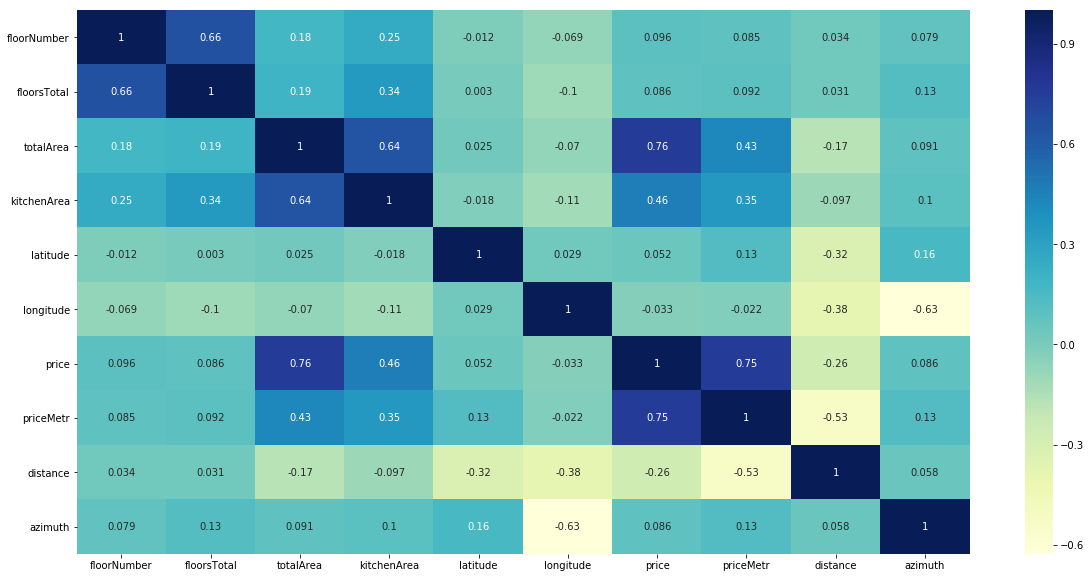

In [25]:
num_vars=data.select_dtypes(include=['float64','int64']).columns
plt.figure(figsize = (20,10))  
sns.heatmap(data[num_vars].corr(),cmap="YlGnBu",annot = True)

# Сохраняем результат

In [26]:
data.to_csv('data.csv', index=False)